# Secret Ingredients for Falling in Love the Second Date

An analysis on the Speed Dating dataset from Kaggle: https://www.kaggle.com/annavictoria/speed-dating-experiment

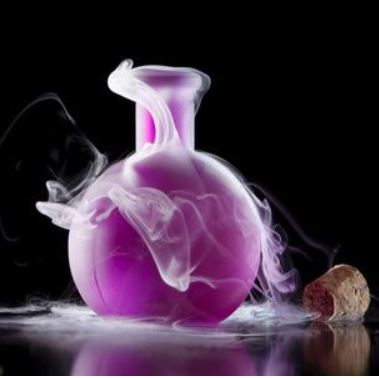

**<p style="text-align: center;"> Taking steps is easy </p>**
**<p style="text-align: center;"> Standing still is hard... </p>**
**<p style="text-align: center;"> Everything is different </p>**
**<p style="text-align: center;"> The second time around.  </p>**
<p style="text-align: center;">                 Regina Spektor  </p>



## Introduction
<p style='text-align: justify;'> What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment. </p>


<p style='text-align: justify;'>Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: </p>

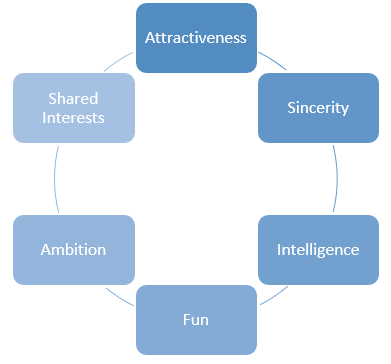

<p style='text-align: justify;'>The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. </p>

## Table of Contents

I. [Clean Dataset : Speed_Dating](#first-bullet)

II. [Desciptive Dataset : Speed_Dating](#2)

III. [Deep dive in love](#3)


In [1]:
# standard
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# displays all columns and rows
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# set class for print
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [2]:
# importing data
Speed_Dating = pd.read_csv("Speed Dating Data.csv", encoding='ISO-8859-1')

# returns the first 10 rows
Speed_Dating.head(10)

iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   
5    1  1.0       0    1       1     1     10         7       NaN      6  ...   
6    1  1.0       0    1       1     1     10         7       NaN      1  ...   
7    1  1.0       0    1       1     1     10         7       NaN      2  ...   
8    1  1.0       0    1       1     1     10         7       NaN      8  ...   
9    1  1.0       0    1       1     1     10         7       NaN      9  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
5      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
6      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
7      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
8      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
9      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  
5     NaN     NaN  
6     NaN     NaN  
7     NaN     NaN  
8     NaN     NaN  
9     NaN     NaN  

[10 rows x 195 columns]

In [3]:
# shows column headers
cols = Speed_Dating.columns.tolist()
print(cols)

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

In [4]:
# describe and info on dataset
Speed_Dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [5]:
print(Speed_Dating.describe())

Speed_Dating1= Speed_Dating.isnull().any()
print(Speed_Dating1)

               iid           id       gender          idg       condtn  \
count  8378.000000  8377.000000  8378.000000  8378.000000  8378.000000   
mean    283.675937     8.960248     0.500597    17.327166     1.828837   
std     158.583367     5.491329     0.500029    10.940735     0.376673   
min       1.000000     1.000000     0.000000     1.000000     1.000000   
25%     154.000000     4.000000     0.000000     8.000000     2.000000   
50%     281.000000     8.000000     1.000000    16.000000     2.000000   
75%     407.000000    13.000000     1.000000    26.000000     2.000000   
max     552.000000    22.000000     1.000000    44.000000     2.000000   

              wave        round     position     positin1        order  ...  \
count  8378.000000  8378.000000  8378.000000  6532.000000  8378.000000  ...   
mean     11.350919    16.872046     9.042731     9.295775     8.927668  ...   
std       5.995903     4.358458     5.514939     5.650199     5.477009  ...   
min       1.00000

# Clean Dataset : Speed_Dating <a class="anchor" id="first-bullet"></a>

Age = NaN => 95 ; 
Race = NaN => 63 ; 
Income = NaN => 4099 ;
Career= NaN => 138 ;


In [6]:
Speed_Dating.income = Speed_Dating['income'].str.replace(",", "").astype(float)

# print the mean missing values in the column age
print( color.UNDERLINE + '\nAverage of the number of missing values :\n'+color.END)
print(Speed_Dating['income'].isnull().mean()) 


Average of the number of missing values :

0.4892575793745524


In [7]:
col = ['age', 'race','career_c']
Speed_Dating = Speed_Dating.replace('NaN', np.NaN)

# Iterate over each column of cc_apps
for col in col:
    # print the modified column
    print(color.BOLD+color.UNDERLINE +"\nThe column being cleaned is:"+color.END+color.END, col.upper(), "\n")
    # find the missing values in the column age
    print( color.UNDERLINE + 'Number of missing value :\n'+color.END)
    print(Speed_Dating[col].isnull().value_counts())
    print( '------------------------')
    
    # print the mean missing values in the column age
    print( color.UNDERLINE + '\nAverage of the number of missing values :\n'+color.END)
    print(Speed_Dating[col].isnull().mean())    
        
    
    # replace the missing values in the column age by mediane
    m= Speed_Dating[col].value_counts().index[0]
    Speed_Dating[[col]]=Speed_Dating[[col]].fillna(m)
    print( '------------------------')

    # print the mean missing values in the column age
    print( color.UNDERLINE + '\nAverage of the number of missing values after replace NaNs by median:\n'+color.END)
    print(Speed_Dating[col].isnull().mean())


The column being cleaned is: AGE 

Number of missing value :

False    8283
True       95
Name: age, dtype: int64
------------------------

Average of the number of missing values :

0.0113392217713058
------------------------

Average of the number of missing values after replace NaNs by median:

0.0

The column being cleaned is: RACE 

Number of missing value :

False    8315
True       63
Name: race, dtype: int64
------------------------

Average of the number of missing values :

0.007519694437813321
------------------------

Average of the number of missing values after replace NaNs by median:

0.0

The column being cleaned is: CAREER_C 

Number of missing value :

False    8240
True      138
Name: career_c, dtype: int64
------------------------

Average of the number of missing values :

0.016471711625686322
------------------------

Average of the number of missing values after replace NaNs by median:

0.0


# Desciptive Dataset : Speed_Dating <a class="anchor" id="2"></a>

Keys features :
- 551 persons ('iid') = partner ('pid')
- 22 rounds
- iid 118 missing

Number of women and men :

Male      277
Female    274
Name: gender, dtype: int64


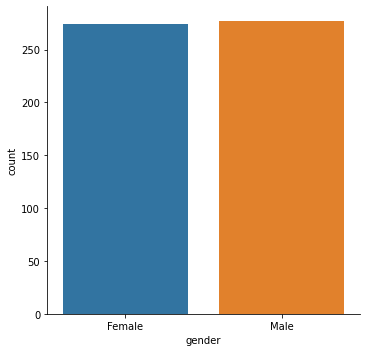

------------------------

Number of people :

1    551
Name: iid, dtype: int64
------------------------

Number of partner :

1    551
Name: pid, dtype: int64
------------------------

'iid' is missing : 118


In [8]:
# count the number of women and men
Speed_Dating_G = Speed_Dating.groupby(['iid','gender']).size().reset_index()
Speed_Dating_G.gender.map({1 : 'Male', 0 : 'Female'}).value_counts()

Speed_Dating_G['gender']=Speed_Dating_G.gender.map({1 : 'Male', 0 : 'Female'})

# print result 
print( color.UNDERLINE + 'Number of women and men :\n'+color.END)
print(Speed_Dating_G.gender.value_counts())
sns.catplot('gender', data = Speed_Dating_G, kind= "count")
plt.show()

# count the number people and partner (normaly nb partner = nb people)
Speed_Dating_PID= Speed_Dating.groupby('pid').size().reset_index()
Speed_Dating_PID.pid.value_counts()
Speed_Dating_IID= Speed_Dating.groupby('iid').size().reset_index()
Speed_Dating_IID.iid.value_counts()

# print result 
print( '------------------------')
print(color.UNDERLINE + '\nNumber of people :\n'+color.END )
print(Speed_Dating_IID.iid.value_counts().value_counts())
print( '------------------------')
print( color.UNDERLINE + '\nNumber of partner :\n'+color.END)
print(Speed_Dating_PID.pid.value_counts().value_counts())
print( '------------------------\n')

# missing iid (Speed_Dating.describe => iid = 552)
i = 0
for elem in Speed_Dating_IID.iid:
    i += 1
    while elem!= i:
        print (color.BOLD+color.RED+ "'iid' is missing :"+color.END+color.END,  i)
        i += 1

551


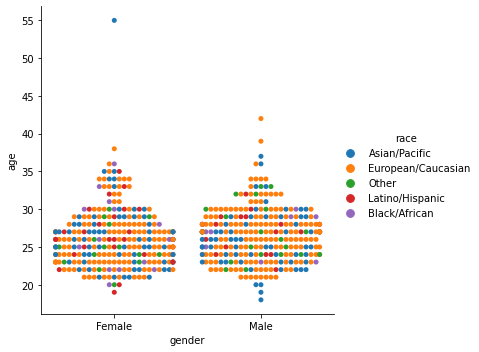

551


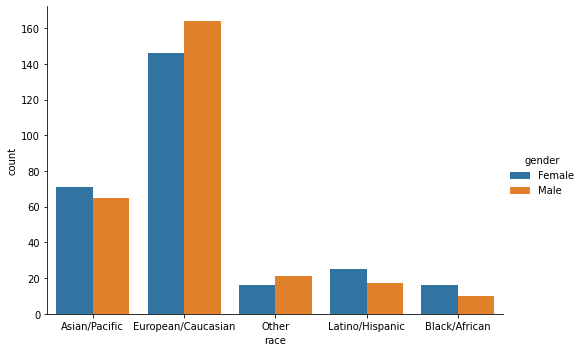

281


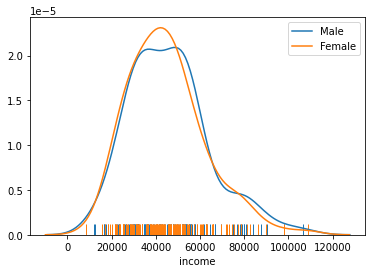

In [90]:
# age

Speed_Dating_Age = Speed_Dating.groupby(['iid','age', "gender",'race']).size().reset_index()
print(Speed_Dating_Age.age.value_counts().sum())
Speed_Dating_Age['gender']=Speed_Dating_Age.gender.map({1 : 'Male', 0 : 'Female'})
Speed_Dating_Age['race'] = Speed_Dating_Age.race.map({1 : 'Black/African', 2 : 'European/Caucasian', 
                                                        3 : 'Latino/Hispanic', 4 : 'Asian/Pacific',
                                                       5 : 'Native', 6 : 'Other'})
sns.catplot(x='gender', y ='age', data= Speed_Dating_Age, kind ='swarm', hue= 'race')
plt.show()

# race

Speed_Dating_Race = Speed_Dating.groupby(['iid','race', "gender"]).size().reset_index()
print(Speed_Dating_Race.race.value_counts().sum())
Speed_Dating_Race['gender']=Speed_Dating_Race.gender.map({1 : 'Male', 0 : 'Female'})
Speed_Dating_Race['race'] = Speed_Dating_Race.race.map({1 : 'Black/African', 2 : 'European/Caucasian', 
                                                        3 : 'Latino/Hispanic', 4 : 'Asian/Pacific',
                                                       5 : 'Native', 6 : 'Other'})

sns.catplot(x='race', hue='gender', data= Speed_Dating_Race, kind ="count", aspect = 1.4)
plt.show()

# income

Speed_Dating_Income = Speed_Dating.groupby(['iid','income', "gender"]).size().reset_index()
print(Speed_Dating_Income.income.value_counts().sum())
Speed_Dating_Income['gender']=Speed_Dating_Income.gender.map({1 : 'Male', 0 : 'Female'})

Speed_Dating_Income['income'].dropna()


sns.distplot(Speed_Dating_Income.income[Speed_Dating_Income['gender']=='Male'].dropna(),
             hist=False, rug=True, label= "Male")
sns.distplot(Speed_Dating_Income.income[Speed_Dating_Income['gender']=='Female'].dropna(),
             hist=False, rug=True,label= "Female")
plt.show()

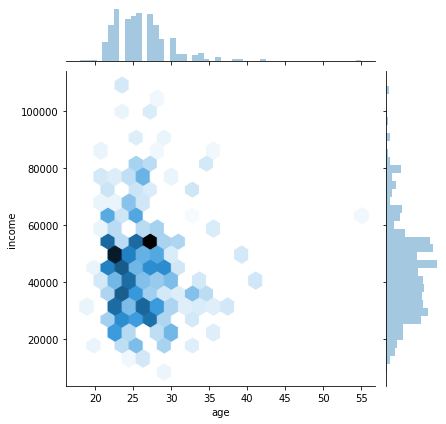

In [102]:
# Hexbin graph on income
#Speed_Dating.plot.hexbin(x='age', y='income', gridsize=20)
#plt.title("Breakdown of Income by Age ")
#plt.xlabel('Income')
#plt.show()

sns.jointplot(x='age', y='income', data=Speed_Dating, kind='hex', 
              gridsize=20)


In [103]:
#Do we care about religion ? (1-10) - the most important 10

Speed_Dating_RI= Speed_Dating[['gender', 'race', 'imprelig','iid']]
Speed_Dating_RI.race= Speed_Dating_RI.race.map({1 : 'Black/African', 2 : 'European/Caucasian', 
                                                        3 : 'Latino/Hispanic', 4 : 'Asian/Pacific',
                                                       5 : 'Native', 6 : 'Other'})
Speed_Dating_RI.gender= Speed_Dating_RI.gender.map({1 : 'Male', 0 : 'Female'})

Speed_Dating_RI[['gender', 'race', 'imprelig']].groupby(['gender', 'race'])\
.agg(['mean', 'median', 'min', 'max'])

C:\Users\kaill\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



imprelig                  
                               mean median  min   max
gender race                                          
Female Asian/Pacific       3.649761    3.0  1.0  10.0
       Black/African       3.614108    2.0  1.0  10.0
       European/Caucasian  4.630762    5.0  1.0  10.0
       Latino/Hispanic     3.451613    3.0  1.0  10.0
       Other               4.730612    5.0  1.0  10.0
Male   Asian/Pacific       2.529349    1.0  1.0   8.0
       Black/African       1.754190    1.0  1.0   4.0
       European/Caucasian  3.443254    3.0  1.0  10.0
       Latino/Hispanic     3.256705    3.0  1.0   9.0
       Other               2.574007    1.0  1.0   9.0

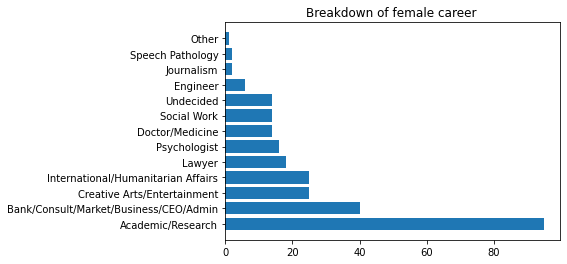

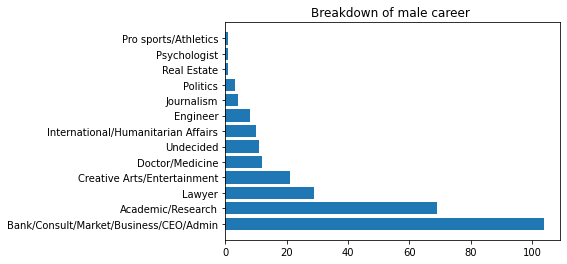

In [11]:
# career
career = ("Lawyer","Academic/Research","Psychologist","Doctor/Medicine",
          "Engineer","Creative Arts/Entertainment","Bank/Consult/Market/Business/CEO/Admin",
          "Real Estate","International/Humanitarian Affairs","Undecided","Social Work",
          "Speech Pathology","Politics","Pro sports/Athletics","Other","Journalism","Architecture")

career_F=("Academic/Research","Bank/Consult/Market/Business/CEO/Admin",
          "Creative Arts/Entertainment","International/Humanitarian Affairs","Lawyer",
          "Psychologist","Doctor/Medicine","Social Work","Undecided",
          "Engineer", "Journalism", "Speech Pathology","Other") 
career_M= ("Bank/Consult/Market/Business/CEO/Admin","Academic/Research","Lawyer",
           "Creative Arts/Entertainment","Doctor/Medicine","Undecided",
           "International/Humanitarian Affairs","Engineer",'Journalism',"Politics",
           "Real Estate","Psychologist","Pro sports/Athletics")


Speed_Dating_Career = Speed_Dating.groupby(['iid','career_c', "gender"]).size().reset_index()
Speed_Dating_Career['career_c'] = Speed_Dating_Career.career_c.map({1 :"Lawyer",2:"Academic/Research",3:"Psychologist",
                                                                  4:"Doctor/Medicine",5:"Engineer",6:"Creative Arts/Entertainment",
                                                                  7:"Bank/Consult/Market/Business/CEO/Admin",8:"Real Estate",
                                                                  9:"International/Humanitarian Affairs",10:"Undecided",
                                                                  11:"Social Work",12:"Speech Pathology",14:"Politics",
                                                                  15:"Pro sports/Athletics",16:"Other",17:"Journalism",
                                                                  18:"Architecture"})

x = Speed_Dating_Career.career_c[Speed_Dating_Career['gender']==0].value_counts()
y = np.arange(len(career_F))                                                     

plt.title("Breakdown of female career ")
plt.barh(y,x)
plt.yticks(y, career_F)
plt.show()

y=np.arange(len(career_M))
x =Speed_Dating_Career.career_c[Speed_Dating_Career['gender']==1].value_counts()                                                        

plt.title("Breakdown of male career ")
plt.barh(y,x)
plt.yticks(y, career_M)
plt.show()



# Deep dive in love <a class="anchor" id="3"></a>

We want to know the difference between the representation of our criteria for choosing a person before the meeting and the criteria of the person we chose after the meeting. 

We need the criteria :'Attractive','Sincere','Intelligent','Fun', 'Ambitious' and 'Has shared interests/hobbies'.

We chose time 1 before we have a rendez-vous and time 2 after a rendez-vous with a match "yes".

In [12]:
Speed_Dating_Ownscore = Speed_Dating.groupby([ "iid",'attr1_1','sinc1_1',
                                              'intel1_1','fun1_1','amb1_1',
                                              'shar1_1','gender']).size().reset_index()
Score_o = Speed_Dating_Ownscore[['attr1_1','sinc1_1','intel1_1',
                                 'fun1_1','amb1_1','shar1_1']][Speed_Dating_Ownscore.gender==1].mean()

Speed_Dating_Rating = Speed_Dating.groupby([ "pid",'attr7_2','sinc7_2',
                                            'intel7_2','fun7_2','amb7_2',
                                            'shar7_2','match','gender']).size().reset_index()
Rating1 = Speed_Dating_Rating[['attr7_2','sinc7_2','intel7_2',
                               'fun7_2','amb7_2','shar7_2','gender']][Speed_Dating_Rating.match ==1]
Rating= Rating1[['attr7_2','sinc7_2','intel7_2','fun7_2','amb7_2','shar7_2']][Rating1.gender==1].mean()

In [13]:
Score_o=Score_o.to_frame().reset_index()

Score_o['index']=Score_o['index'].map({'attr1_1' : 'Attractive','sinc1_1' :'Sincere','intel1_1':'Intelligent',
                        'fun1_1' :'Fun', 'amb1_1':'Ambitious','shar1_1' :'Has shared interests/hobbies' })
Rating =Rating.to_frame().reset_index()


Rating['index']=Rating['index'].map({'attr7_2' : 'Attractive','sinc7_2' :'Sincere','intel7_2':'Intelligent',
                        'fun7_2' :'Fun', 'amb7_2':'Ambitious','shar7_2' :'Has shared interests/hobbies'})

In [14]:
Score_o[0]=Score_o[0]/(10)
Rating[0] = Rating[0]/(10)

In [15]:
np.array(Score_o[0])
np.array(Rating[0])

array([3.78789809, 0.96305732, 1.53503185, 2.13248408, 0.58471338,
       0.9522293 ])

In [16]:
# radar chart male

categories = ['Attractive','Sincere','Intelligent',
              'Fun', 'Ambitious','Has shared interests/hobbies']

print(color.UNDERLINE +'\n6 factor Profiles for male before and after if match = yes:'+color.END)

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=np.array(Score_o[0]),
      theta=categories,
      fill='toself',
      name='Score before'
))
fig.add_trace(go.Scatterpolar(
      r=np.array(Rating[0]),
      theta=categories,
      fill='toself',
      name='Rating after'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 4]
    )),
  showlegend=False
)

fig.show()


6 factor Profiles for male before and after if match = yes:


In [17]:
Speed_Dating_Ownscore = Speed_Dating.groupby([ "iid",'attr1_1','sinc1_1',
                                              'intel1_1','fun1_1','amb1_1',
                                              'shar1_1','gender']).size().reset_index()
Score_oF = Speed_Dating_Ownscore[['attr1_1','sinc1_1','intel1_1',
                                  'fun1_1','amb1_1','shar1_1']][Speed_Dating_Ownscore.gender==0].mean()

Speed_Dating_Rating = Speed_Dating.groupby([ "pid",'attr7_2','sinc7_2',
                                            'intel7_2','fun7_2','amb7_2',
                                            'shar7_2','match','gender']).size().reset_index()
Rating1 = Speed_Dating_Rating[['attr7_2','sinc7_2','intel7_2',
                               'fun7_2','amb7_2','shar7_2','gender']][Speed_Dating_Rating.match ==1]
RatingF= Rating1[['attr7_2','sinc7_2','intel7_2',
                  'fun7_2','amb7_2','shar7_2']][Rating1.gender==0].mean()

In [18]:
Score_oF=Score_oF.to_frame().reset_index()

Score_oF['index']=Score_oF['index'].map({'attr1_1' : 'Attractive','sinc1_1' :'Sincere','intel1_1':'Intelligent',
                        'fun1_1' :'Fun', 'amb1_1':'Ambitious','shar1_1' :'Has shared interests/hobbies' })
RatingF =RatingF.to_frame().reset_index()


RatingF['index']=RatingF['index'].map({'attr7_2' : 'Attractive','sinc7_2' :'Sincere','intel7_2':'Intelligent',
                        'fun7_2' :'Fun', 'amb7_2':'Ambitious','shar7_2' :'Has shared interests/hobbies'})

In [19]:
Score_oF[0]=Score_oF[0]/(10)
RatingF[0] = RatingF[0]/(10)

In [20]:
print(np.array(Score_oF[0]))
print(np.array(RatingF[0]))

[1.79383582 1.82529104 2.09373134 1.73263433 1.28289925 1.26978358]
[2.70818713 1.6502924  1.59005848 1.9251462  0.82807018 1.24561404]


In [21]:
# radar chart female

categories = ['Attractive','Sincere','Intelligent',
              'Fun', 'Ambitious','Has shared interests/hobbies']

print(color.UNDERLINE +'\n6 factor Profiles for female before and after if match = yes:'+color.END)
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=np.array(Score_oF[0]),
      theta=categories,
      fill='toself',
      name='Score before'
))
fig.add_trace(go.Scatterpolar(
      r=np.array(RatingF[0]),
      theta=categories,
      fill='toself',
      name='Rating after'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 3.5]
    )),
  showlegend=False
)

fig.show()


6 factor Profiles for female before and after if match = yes:


In [57]:
Speed_Dating_Corr= Speed_Dating[['attr7_2','sinc7_2','intel7_2','fun7_2','amb7_2','shar7_2','match']]
Speed_Dating_Corr= Speed_Dating_Corr.dropna()


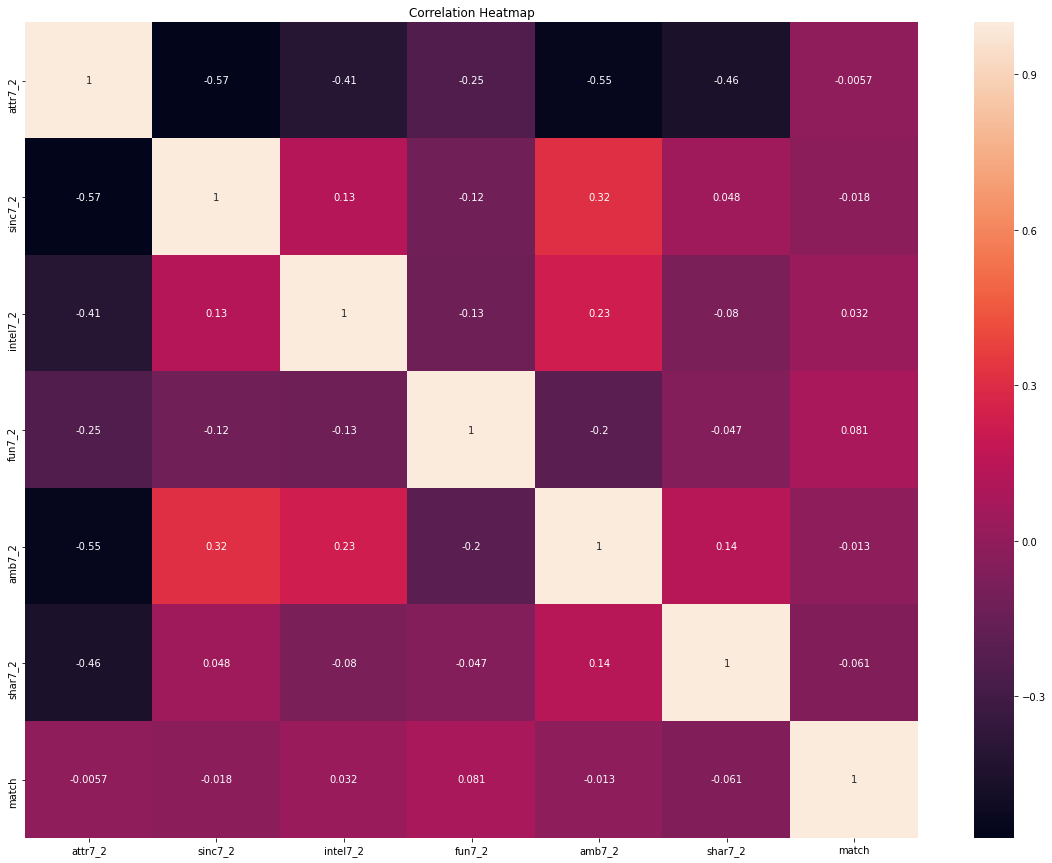

In [62]:
# heatmap on affiche uniquement les variables qui ont une corrélation d'au moins 50% avec un autre variable
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = Speed_Dating_Corr.corr()
max_corr = [max(abs(a[a!=1])) for a in corr.values]
date4 = Speed_Dating_Corr.iloc[:,]
corr_high = date4.corr()
sns.heatmap(corr_high, 
            xticklabels=corr_high.columns.values,
            yticklabels=corr_high.columns.values,
           annot=True)

In [135]:
#Test

Speed = Speed_Dating[Speed_Dating.match == 1].groupby([ "iid",'pid', 'match']).size().reset_index()

Speed = Speed[["iid",'pid', 'match']]


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
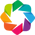

In [124]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

hv.extension('bokeh')
hv.output(size=200)


In [128]:
links = pd.DataFrame(Speed)
print(links.head(3))

   iid   pid  match
0    1  13.0      1
1    1  14.0      1
2    1  15.0      1


In [129]:
hv.Chord(links)

:Chord   [iid,pid]   (match)